In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import requests
import gmaps
import os
import json
import scipy.stats as st
from scipy.stats import linregress

from api_keys import g_key

In [2]:
wine_data = pd.read_csv("/Users/bader/Desktop/BootCamp_HW_Assignments/Project1_Wine_Weather/Wine_Weather_Project/wine_data_with_year.csv")
weather_data = pd.read_csv("/Users/bader/Desktop/BootCamp_HW_Assignments/Project1_Wine_Weather/Wine_Weather_Project/full_weather.csv")

C:\Users\bader\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,3,5,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
winery = wine_data["region_1"].value_counts()
winery = winery.head(26)
winery

Napa Valley                4480
Columbia Valley (WA)       4124
Russian River Valley       3091
California                 2629
Paso Robles                2350
Mendoza                    2301
Willamette Valley          2301
Alsace                     2163
Champagne                  1613
Barolo                     1599
Finger Lakes               1565
Sonoma Coast               1474
Brunello di Montalcino     1470
Rioja                      1469
Sonoma County              1246
Toscana                    1197
Walla Walla Valley (WA)    1066
Chianti Classico           1062
Santa Barbara County       1000
Carneros                    999
Yakima Valley               997
Sta. Rita Hills             975
Dry Creek Valley            939
Sicilia                     925
Côtes de Provence           859
Santa Ynez Valley           812
Name: region_1, dtype: int64

In [4]:
top25 = ['Napa Valley',
         'Columbia Valley',
         'Russian River Valley',
         'Paso Robles',
         'Willamette Valley',
         'Mendoza',
         'Alsace',
         'Champagne',
         'Barolo',
         'Finger Lakes',
         'Sonoma Coast',
         'Brunello di Montalcino',
         'Rioja',
         'Sonoma County',
         'Toscana',
         'Walla Walla Valley',
         'Chianti Classico',
         'Santa Barbara County',
         'Carneros',
         'Yakima Valley',
         'Sta. Rita Hills',
         'Dry Creek Valley',
         'Sicilia',
         'Côtes de Provence',
         'Santa Ynez Valley']

In [5]:
# Target city
target_city = "Napa Valley"

# Build the endpoint URL
target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_city, g_key)

In [6]:

# Run a request to endpoint and convert result to json
geo_data = requests.get(target_url).json()

# Print the json
print(geo_data)

{'results': [{'address_components': [{'long_name': 'Napa County', 'short_name': 'Napa County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'California', 'short_name': 'CA', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}], 'formatted_address': 'Napa County, CA, USA', 'geometry': {'bounds': {'northeast': {'lat': 38.8642448, 'lng': -122.0613789}, 'southwest': {'lat': 38.1548941, 'lng': -122.6464211}}, 'location': {'lat': 38.5024689, 'lng': -122.2653887}, 'location_type': 'APPROXIMATE', 'viewport': {'northeast': {'lat': 38.8642448, 'lng': -122.0613789}, 'southwest': {'lat': 38.1548941, 'lng': -122.6464211}}}, 'place_id': 'ChIJMU8qI_lPhIARfMUQoxvSFP4', 'types': ['administrative_area_level_2', 'political']}, {'address_components': [{'long_name': 'Napa', 'short_name': 'Napa', 'types': ['locality', 'political']}, {'long_name': 'Napa County', 'short_name': 'Napa County', 'typ

In [7]:

# Print the json (pretty printed)
print(json.dumps(geo_data, indent=4, sort_keys=True))

{
    "results": [
        {
            "address_components": [
                {
                    "long_name": "Napa County",
                    "short_name": "Napa County",
                    "types": [
                        "administrative_area_level_2",
                        "political"
                    ]
                },
                {
                    "long_name": "California",
                    "short_name": "CA",
                    "types": [
                        "administrative_area_level_1",
                        "political"
                    ]
                },
                {
                    "long_name": "United States",
                    "short_name": "US",
                    "types": [
                        "country",
                        "political"
                    ]
                }
            ],
            "formatted_address": "Napa County, CA, USA",
            "geometry": {
                "bounds": {
             

In [8]:

lat = []
long = []
city_name = []

In [9]:
for city in top25:
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(city, g_key)
    response = requests.get(target_url).json()
    print("Processing", city)
    
    try:
        lat.append(response["results"][0]["geometry"]["location"]["lat"])
        long.append(response["results"][0]["geometry"]["location"]["lng"])
        city_name.append(city)
    except (RuntimeError, TypeError, NameError, KeyError, IndexError):
        print("No data to show here")

Processing Napa Valley
Processing Columbia Valley
Processing Russian River Valley
Processing Paso Robles
Processing Willamette Valley
Processing Mendoza
Processing Alsace
Processing Champagne
Processing Barolo
Processing Finger Lakes
Processing Sonoma Coast
Processing Brunello di Montalcino
Processing Rioja
Processing Sonoma County
Processing Toscana
Processing Walla Walla Valley
Processing Chianti Classico
Processing Santa Barbara County
Processing Carneros
Processing Yakima Valley
Processing Sta. Rita Hills
Processing Dry Creek Valley
Processing Sicilia
Processing Côtes de Provence
Processing Santa Ynez Valley


In [10]:

# create a data frame from cities, lat, and temp
wine_dict = {
    "City": city_name,
    "Latitude": lat, 
    "Longitude": long}

map_wine_data = pd.DataFrame(wine_dict)
map_wine_data

,City,Latitude,Longitude
0,Napa Valley,38.502469,-122.265389
1,Columbia Valley,47.419055,-120.318042
2,Russian River Valley,38.911980,-123.053708
3,Paso Robles,35.636876,-120.654502
4,Willamette Valley,44.942554,-122.933762
5,Mendoza,-32.889459,-68.845839
6,Alsace,48.318179,7.441624
7,Champagne,30.203476,-92.016898
8,Barolo,40.250902,-75.132658
9,Finger Lakes,42.723816,-76.929725


In [11]:
# Configure gmaps with API key
gmaps.configure(api_key=g_key) 

# Store 'Lat' and 'Lng' into  locations 
locations = map_wine_data[["Latitude", "Longitude"]].astype(float)

In [12]:

fig = gmaps.figure(zoom_level=2.1, center=(20,-30))

markers = gmaps.marker_layer(locations)
fig.add_layer(markers)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
#Take a look at all the column names for the weather csv
weather_data.columns

Index(['dt', 'date', 'year', 'Hour', 'timezone', 'city_name', 'lat', 'lon',
       'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level',
       'grnd_level', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon'],
      dtype='object')

In [14]:
#Take a look at all the column names for the wine csv
wine_data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'year', 'variety', 'winery',
       'city_name'],
      dtype='object')

In [15]:
#Dropped the NA's from wine csv
wine_data.dropna(inplace=True)

In [16]:
#Filter out the rows of data that we are not interested in. 
#We removed all cities that were not Napa Valley and all years that were not between 2010 and 2018
Napa_valley =  wine_data[wine_data['region_1'].str.contains('Napa','Mendoza')]
remove_years_not_needed = Napa_valley[Napa_valley['year']!= 1]

In [17]:
#Removed columns from wine data file that were not needed for our analysis 
napa_valley_wines = remove_years_not_needed.drop(columns=['Unnamed: 0','country','description',
                                                          'designation','price','province','region_1',
                                                          'region_2','taster_twitter_handle','taster_name'])

napa_valley_wines.describe()

,points,year
count,1150.000000,1150.000000
mean,89.753043,2012.729565
std,2.812979,1.221684
min,80.000000,2010.000000
25%,88.000000,2012.000000
50%,90.000000,2013.000000
75%,92.000000,2013.000000
max,99.000000,2016.000000


In [18]:
#Removed 2017 and 2018 data from weather because we noticed that where was no data for wine made in those years.
#removed unneeded columns from the weather data  
weather_data_df = pd.DataFrame(weather_data)

weather_data_df = weather_data_df[weather_data_df['year'] <= 2016]
weather = weather_data_df.drop(columns=['dt','Hour','timezone','feels_like',
                                        'temp_min','temp_max',
                                        'sea_level','grnd_level','pressure',
                                        'wind_deg','clouds_all','rain_3h','snow_1h', 
                                        'snow_3h','weather_id','weather_main',
                                        'weather_icon','weather_description'])

In [19]:
weather

,date,year,city_name,lat,lon,temp,humidity,wind_speed,rain_1h
0,1/1/2010,2010.0,Napa Valley,38.427431,-122.394330,52.86,79.0,8.05,NaN
1,1/1/2010,2010.0,Napa Valley,38.427431,-122.394330,52.75,79.0,8.05,NaN
2,1/1/2010,2010.0,Napa Valley,38.427431,-122.394330,52.50,79.0,6.93,NaN
3,1/1/2010,2010.0,Napa Valley,38.427431,-122.394330,51.69,82.0,5.82,NaN
4,1/1/2010,2010.0,Napa Valley,38.427431,-122.394330,51.33,86.0,4.70,NaN
...,...,...,...,...,...,...,...,...,...
141800,12/31/2016,2016.0,Mendoza,-32.889625,-68.852687,100.44,22.0,2.24,NaN
141801,12/31/2016,2016.0,Mendoza,-32.889625,-68.852687,100.80,24.0,8.05,NaN
141802,12/31/2016,2016.0,Mendoza,-32.889625,-68.852687,101.46,24.0,5.82,NaN
141803,12/31/2016,2016.0,Mendoza,-32.889625,-68.852687,99.73,25.0,8.05,NaN


In [20]:
weather.describe()

,year,lat,lon,temp,humidity,wind_speed,rain_1h
count,123904.000000,123904.000000,123904.000000,123904.000000,123904.000000,123904.000000,5421.000000
mean,2013.004625,2.947909,-95.757898,60.591944,63.201333,6.262441,1.051306
std,2.004036,35.658223,26.770592,13.536643,24.444983,4.147384,1.173403
min,2010.000000,-32.889625,-122.394330,23.430000,1.000000,0.020000,0.100000
25%,2011.000000,-32.889625,-122.394330,50.970000,43.000000,3.360000,0.320000
50%,2013.000000,38.427431,-122.394330,59.020000,64.000000,4.700000,0.570000
75%,2015.000000,38.427431,-68.852687,69.940000,86.000000,8.050000,1.420000
max,2016.000000,38.427431,-68.852687,108.090000,100.000000,46.080000,10.360000


In [21]:
#Merged the two csv files by year
weather_wine_data = pd.merge(napa_valley_wines,weather,how='outer',on=['year', 'city_name'])
weather_wine_data.columns

Index(['points', 'title', 'year', 'variety', 'winery', 'city_name', 'date',
       'lat', 'lon', 'temp', 'humidity', 'wind_speed', 'rain_1h'],
      dtype='object')

In [22]:
#Since we need rain data set it to 0 -KD
weather_wine_data['rain_1h'].fillna(0,inplace=True)

In [23]:
#Below is the merged data file 
weather_wine_data

,points,title,year,variety,winery,city_name,date,lat,lon,temp,humidity,wind_speed,rain_1h
0,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.394330,45.70,60.0,3.36,0.0
1,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.394330,45.07,65.0,6.93,0.0
2,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.394330,44.15,65.0,13.87,0.0
3,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.394330,43.47,62.0,11.41,0.0
4,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.394330,43.59,62.0,10.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802155,NaN,NaN,2016,NaN,NaN,Mendoza,12/31/2016,-32.889625,-68.852687,100.44,22.0,2.24,0.0
9802156,NaN,NaN,2016,NaN,NaN,Mendoza,12/31/2016,-32.889625,-68.852687,100.80,24.0,8.05,0.0
9802157,NaN,NaN,2016,NaN,NaN,Mendoza,12/31/2016,-32.889625,-68.852687,101.46,24.0,5.82,0.0
9802158,NaN,NaN,2016,NaN,NaN,Mendoza,12/31/2016,-32.889625,-68.852687,99.73,25.0,8.05,0.0


In [24]:
weather_wine_data.dropna(inplace=True)

In [25]:
weather_wine_data

,points,title,year,variety,winery,city_name,date,lat,lon,temp,humidity,wind_speed,rain_1h
0,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,45.70,60.0,3.36,0.0
1,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,45.07,65.0,6.93,0.0
2,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,44.15,65.0,13.87,0.0
3,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,43.47,62.0,11.41,0.0
4,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,43.59,62.0,10.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740469,90.0,Brick & Mortar 2016 Vin Clair Pinot-Chardonnay...,2016,Pinot-Chardonnay,Brick & Mortar,Napa Valley,12/31/2016,38.427431,-122.39433,47.68,66.0,4.61,0.0
9740470,90.0,Brick & Mortar 2016 Vin Clair Pinot-Chardonnay...,2016,Pinot-Chardonnay,Brick & Mortar,Napa Valley,12/31/2016,38.427431,-122.39433,49.73,66.0,6.91,0.0
9740471,90.0,Brick & Mortar 2016 Vin Clair Pinot-Chardonnay...,2016,Pinot-Chardonnay,Brick & Mortar,Napa Valley,12/31/2016,38.427431,-122.39433,50.92,58.0,3.44,0.0
9740472,90.0,Brick & Mortar 2016 Vin Clair Pinot-Chardonnay...,2016,Pinot-Chardonnay,Brick & Mortar,Napa Valley,12/31/2016,38.427431,-122.39433,52.84,54.0,4.61,0.0


In [26]:
#Renamed the columns to make the file look cleaner
weather_wine_data.rename(columns={'date' : 'Date',
                                  'year':'Year',
                                  'title':'Title',
                                  'points':'Points',
                                  'variety':'Variety',
                                  'winery':'Winery',
                                  'city_name':'City Name',
                                  'lat':'Lat',
                                  'lon':'Lon',
                                  'humidity':'Humidity',
                                  'wind_speed':'Wind Speed (mph)',
                                  'rain_1h': 'Rain (inches)'},inplace=True)
weather_wine_data.head()

,Points,Title,Year,Variety,Winery,City Name,Date,Lat,Lon,temp,Humidity,Wind Speed (mph),Rain (inches)
0,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,45.70,60.0,3.36,0.0
1,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,45.07,65.0,6.93,0.0
2,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,44.15,65.0,13.87,0.0
3,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,43.47,62.0,11.41,0.0
4,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,43.59,62.0,10.29,0.0


In [27]:
#grouped the data by Data,Title and Points and averaged the daily weather values that we are interested in analyzing 
mean_temp = weather_wine_data.groupby(['Date','Title']).mean()

In [28]:
mean_temp

Points  Year  \
Date     Title                                                              
1/1/2010 Benessere 2010 Phenomenon Estate Red (Napa Valley)    88.0  2010   
         Black Stallion 2010 Limited Release Cabernet Sa...    91.0  2010   
         C. Beck 2010 Barlow Vineyard Cabernet Sauvignon...    91.0  2010   
         Castello di Amorosa 2010 La Castellana Red (Nap...    92.0  2010   
         Duckhorn 2010 The Discussion Estate Grown Red (...    94.0  2010   
...                                                             ...   ...   
9/9/2016 Krupp Brothers 2016 The Damsel Rosé (Napa Valley)     90.0  2016   
         Luna 2016 Minuet Sangiovese Rosé (Napa Valley)        90.0  2016   
         Stag's Leap Wine Cellars 2016 Aveta Sauvignon B...    88.0  2016   
         Tres Sabores 2016 Ingrid and Julia Rosé (Napa V...    90.0  2016   
         V. Sattui 2016 Carsi Vineyard Reserve Stock Sau...    90.0  2016   

                                                                   Lat  \
Date     Title                                                           
1/1/2010 Benessere 2010 Phenomenon Estate Red (Napa Valley)  38.427431   
         Black Stallion 2010 Limited Release Cabernet Sa...  38.427431   
         C. Beck 2010 Barlow Vineyard Cabernet Sauvignon...  38.427431   
         Castello di Amorosa 2010 La Castellana Red (Nap...  38.427431   
         Duckhorn 2010 The Discussion Estate Grown Red (...  38.427431   
...                                                                ...   
9/9/2016 Krupp Brothers 2016 The Damsel Rosé (Napa Valley)   38.427431   
         Luna 2016 Minuet Sangiovese Rosé (Napa Valley)      38.427431   
         Stag's Leap Wine Cellars 2016 Aveta Sauvignon B...  38.427431   
         Tres Sabores 2016 Ingrid and Julia Rosé (Napa V...  38.427431   
         V. Sattui 2016 Carsi Vineyard Reserve Stock Sau...  38.427431   

                                                                   Lon  \
Date     Title                                                           
1/1/2010 Benessere 2010 Phenomenon Estate Red (Napa Valley) -122.39433   
         Black Stallion 2010 Limited Release Cabernet Sa... -122.39433   
         C. Beck 2010 Barlow Vineyard Cabernet Sauvignon... -122.39433   
         Castello di Amorosa 2010 La Castellana Red (Nap... -122.39433   
         Duckhorn 2010 The Discussion Estate Grown Red (... -122.39433   
...                                                                ...   
9/9/2016 Krupp Brothers 2016 The Damsel Rosé (Napa Valley)  -122.39433   
         Luna 2016 Minuet Sangiovese Rosé (Napa Valley)     -122.39433   
         Stag's Leap Wine Cellars 2016 Aveta Sauvignon B... -122.39433   
         Tres Sabores 2016 Ingrid and Julia Rosé (Napa V... -122.39433   
         V. Sattui 2016 Carsi Vineyard Reserve Stock Sau... -122.39433   

                                                                 temp  \
Date     Title                                                          
1/1/2010 Benessere 2010 Phenomenon Estate Red (Napa Valley)  51.29680   
         Black Stallion 2010 Limited Release Cabernet Sa...  51.29680   
         C. Beck 2010 Barlow Vineyard Cabernet Sauvignon...  51.29680   
         Castello di Amorosa 2010 La Castellana Red (Nap...  51.29680   
         Duckhorn 2010 The Discussion Estate Grown Red (...  51.29680   
...                                                               ...   
9/9/2016 Krupp Brothers 2016 The Damsel Rosé (Napa Valley)   63.48125   
         Luna 2016 Minuet Sangiovese Rosé (Napa Valley)      63.48125   
         Stag's Leap Wine Cellars 2016 Aveta Sauvignon B...  63.48125   
         Tres Sabores 2016 Ingrid and Julia Rosé (Napa V...  63.48125   
         V. Sattui 2016 Carsi Vineyard Reserve Stock Sau...  63.48125   

                                                             Humidity  \
Date     Title                                                          
1/1/2010 Benessere 2010 Phenomenon Es

In [29]:
temp = mean_temp.reset_index()

In [30]:
temp_df = pd.DataFrame(temp)

In [101]:
temp_df

,Date,Title,Points,Year,Lat,Lon,temp,Humidity,Wind Speed (mph),Rain (inches)
0,1/1/2010,Benessere 2010 Phenomenon Estate Red (Napa Val...,88.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528
1,1/1/2010,Black Stallion 2010 Limited Release Cabernet S...,91.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528
2,1/1/2010,C. Beck 2010 Barlow Vineyard Cabernet Sauvigno...,91.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528
3,1/1/2010,Castello di Amorosa 2010 La Castellana Red (Na...,92.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528
4,1/1/2010,Duckhorn 2010 The Discussion Estate Grown Red ...,94.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528
...,...,...,...,...,...,...,...,...,...,...
364578,9/9/2016,Krupp Brothers 2016 The Damsel Rosé (Napa Valley),90.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000
364579,9/9/2016,Luna 2016 Minuet Sangiovese Rosé (Napa Valley),90.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000
364580,9/9/2016,Stag's Leap Wine Cellars 2016 Aveta Sauvignon ...,88.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000
364581,9/9/2016,Tres Sabores 2016 Ingrid and Julia Rosé (Napa ...,90.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000


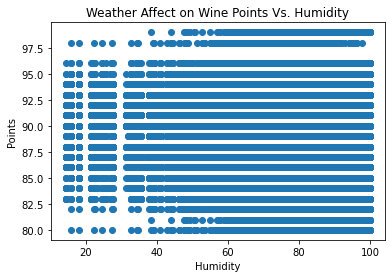

<Figure size 432x288 with 0 Axes>

In [84]:
humidity = temp_df['Humidity']
points = temp_df['Points']
plt.scatter(humidity,points)
plt.title('Weather Affect on Wine Points Vs. Humidity')
plt.ylabel('Points')
plt.xlabel('Humidity')
plt.show()

plt.savefig('Humid_Points.png')

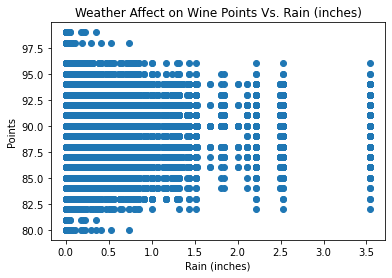

<Figure size 432x288 with 0 Axes>

In [85]:
rain = temp_df['Rain (inches)']
points = temp_df['Points']
plt.scatter(rain, points)
plt.title('Weather Affect on Wine Points Vs. Rain (inches)')
plt.ylabel('Points')
plt.xlabel('Rain (inches)')
plt.show()

plt.savefig('rain_date.png')

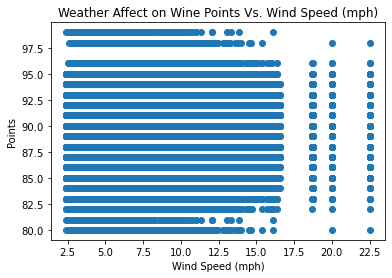

<Figure size 432x288 with 0 Axes>

In [86]:
wind = temp_df['Wind Speed (mph)']
points = temp_df['Points']
plt.scatter(wind,points)
plt.title('Weather Affect on Wine Points Vs. Wind Speed (mph)')
plt.ylabel('Points')
plt.xlabel('Wind Speed (mph)')
plt.show()

plt.savefig('Wind_Points.png')

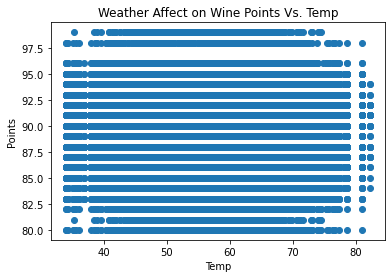

<Figure size 432x288 with 0 Axes>

In [87]:
temp = temp_df['temp']
points = temp_df['Points']
plt.scatter(temp, points)
plt.title('Weather Affect on Wine Points Vs. Temp')
plt.ylabel('Points')
plt.xlabel('Temp')
plt.show()

plt.savefig('Temp_Points.png')

In [36]:
date_ordinal_df = weather_wine_data.groupby(['Date','Title']).mean()

In [37]:
date_ordinal_reset = date_ordinal_df.reset_index()

In [38]:
date_ordinal_data = pd.DataFrame(date_ordinal_reset)

In [39]:
date_ordinal_data

,Date,Title,Points,Year,Lat,Lon,temp,Humidity,Wind Speed (mph),Rain (inches)
0,1/1/2010,Benessere 2010 Phenomenon Estate Red (Napa Val...,88.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528
1,1/1/2010,Black Stallion 2010 Limited Release Cabernet S...,91.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528
2,1/1/2010,C. Beck 2010 Barlow Vineyard Cabernet Sauvigno...,91.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528
3,1/1/2010,Castello di Amorosa 2010 La Castellana Red (Na...,92.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528
4,1/1/2010,Duckhorn 2010 The Discussion Estate Grown Red ...,94.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528
...,...,...,...,...,...,...,...,...,...,...
364578,9/9/2016,Krupp Brothers 2016 The Damsel Rosé (Napa Valley),90.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000
364579,9/9/2016,Luna 2016 Minuet Sangiovese Rosé (Napa Valley),90.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000
364580,9/9/2016,Stag's Leap Wine Cellars 2016 Aveta Sauvignon ...,88.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000
364581,9/9/2016,Tres Sabores 2016 Ingrid and Julia Rosé (Napa ...,90.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000


In [40]:
date_ordinal_data['Date'] = pd.to_datetime(date_ordinal_data['Date'])

In [41]:
date_ordinal_data

,Date,Title,Points,Year,Lat,Lon,temp,Humidity,Wind Speed (mph),Rain (inches)
0,2010-01-01,Benessere 2010 Phenomenon Estate Red (Napa Val...,88.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528
1,2010-01-01,Black Stallion 2010 Limited Release Cabernet S...,91.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528
2,2010-01-01,C. Beck 2010 Barlow Vineyard Cabernet Sauvigno...,91.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528
3,2010-01-01,Castello di Amorosa 2010 La Castellana Red (Na...,92.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528
4,2010-01-01,Duckhorn 2010 The Discussion Estate Grown Red ...,94.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528
...,...,...,...,...,...,...,...,...,...,...
364578,2016-09-09,Krupp Brothers 2016 The Damsel Rosé (Napa Valley),90.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000
364579,2016-09-09,Luna 2016 Minuet Sangiovese Rosé (Napa Valley),90.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000
364580,2016-09-09,Stag's Leap Wine Cellars 2016 Aveta Sauvignon ...,88.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000
364581,2016-09-09,Tres Sabores 2016 Ingrid and Julia Rosé (Napa ...,90.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000


In [43]:
date_ordinal_data['date_ordinal'] = pd.to_datetime(date_ordinal_data['Date']).apply(lambda date: date.toordinal())

In [44]:
date_ordinal_data

,Date,Title,Points,Year,Lat,Lon,temp,Humidity,Wind Speed (mph),Rain (inches),date_ordinal
0,2010-01-01,Benessere 2010 Phenomenon Estate Red (Napa Val...,88.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528,733773
1,2010-01-01,Black Stallion 2010 Limited Release Cabernet S...,91.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528,733773
2,2010-01-01,C. Beck 2010 Barlow Vineyard Cabernet Sauvigno...,91.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528,733773
3,2010-01-01,Castello di Amorosa 2010 La Castellana Red (Na...,92.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528,733773
4,2010-01-01,Duckhorn 2010 The Discussion Estate Grown Red ...,94.0,2010,38.427431,-122.39433,51.29680,89.80,4.7132,0.0528,733773
...,...,...,...,...,...,...,...,...,...,...,...
364578,2016-09-09,Krupp Brothers 2016 The Damsel Rosé (Napa Valley),90.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000,736216
364579,2016-09-09,Luna 2016 Minuet Sangiovese Rosé (Napa Valley),90.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000,736216
364580,2016-09-09,Stag's Leap Wine Cellars 2016 Aveta Sauvignon ...,88.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000,736216
364581,2016-09-09,Tres Sabores 2016 Ingrid and Julia Rosé (Napa ...,90.0,2016,38.427431,-122.39433,63.48125,77.75,9.3525,0.0000,736216


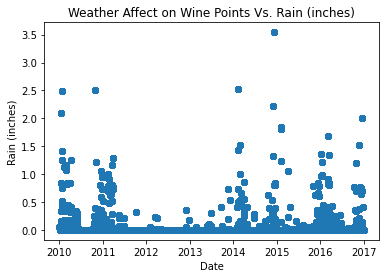

In [88]:
rain = date_ordinal_data['Rain (inches)']
date = date_ordinal_data['Date']
plt.scatter(date,rain)
plt.title('Weather Affect on Wine Points Vs. Rain (inches)')
plt.xlabel('Date')
plt.ylabel('Rain (inches)')
plt.show()

Correlation between the two variables is: 0.05


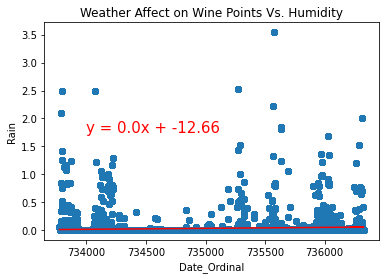

<Figure size 432x288 with 0 Axes>

In [47]:
date_regress = date_ordinal_data['date_ordinal']
rain_regress = date_ordinal_data['Rain (inches)']
correlation = st.pearsonr(date_regress,rain_regress)
(slope, intercept, rvalue, pvalue, stderr) = linregress(date_regress, rain_regress)
regress_values = date_regress * slope + intercept
line_eq = "y = " + str(slope.round(2)) + "x + " + str(intercept.round(2))
plt.scatter(date_regress,rain_regress)
plt.plot(date_regress, regress_values, "r-")
plt.annotate(line_eq, (734000,1.75), fontsize=15,color='red')
plt.title('Weather Affect on Wine Points Vs. Humidity')
plt.xlabel('Date_Ordinal')
plt.ylabel('Rain')
print(f'Correlation between the two variables is: {correlation[0].round(2)}')
plt.show()

plt.savefig('Regression.png')

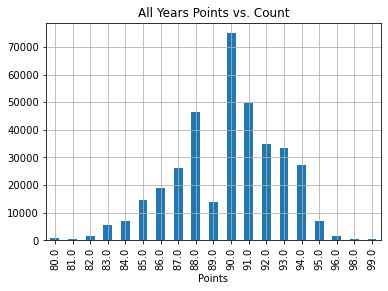

In [48]:
all_years = temp_df.groupby(['Points']).count()['Lat'].plot(kind='bar', title='All Years Points vs. Count')
plt.grid()

plt.savefig('All_points_bar.png')

In [49]:
weather_wine_data

,Points,Title,Year,Variety,Winery,City Name,Date,Lat,Lon,temp,Humidity,Wind Speed (mph),Rain (inches)
0,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,45.70,60.0,3.36,0.0
1,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,45.07,65.0,6.93,0.0
2,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,44.15,65.0,13.87,0.0
3,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,43.47,62.0,11.41,0.0
4,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,43.59,62.0,10.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740469,90.0,Brick & Mortar 2016 Vin Clair Pinot-Chardonnay...,2016,Pinot-Chardonnay,Brick & Mortar,Napa Valley,12/31/2016,38.427431,-122.39433,47.68,66.0,4.61,0.0
9740470,90.0,Brick & Mortar 2016 Vin Clair Pinot-Chardonnay...,2016,Pinot-Chardonnay,Brick & Mortar,Napa Valley,12/31/2016,38.427431,-122.39433,49.73,66.0,6.91,0.0
9740471,90.0,Brick & Mortar 2016 Vin Clair Pinot-Chardonnay...,2016,Pinot-Chardonnay,Brick & Mortar,Napa Valley,12/31/2016,38.427431,-122.39433,50.92,58.0,3.44,0.0
9740472,90.0,Brick & Mortar 2016 Vin Clair Pinot-Chardonnay...,2016,Pinot-Chardonnay,Brick & Mortar,Napa Valley,12/31/2016,38.427431,-122.39433,52.84,54.0,4.61,0.0


In [50]:
year_2010 = temp_df[temp_df['Year'] == 2010]

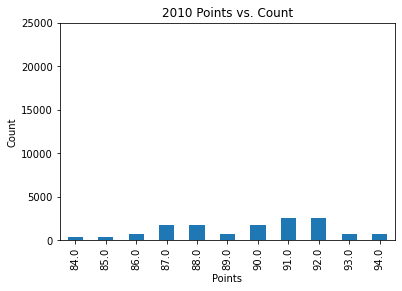

In [93]:
first_year = year_2010.groupby(['Points']).count()['Lat'].plot(kind='bar',xlim=(80,99),ylim=(0,25000),title='2010 Points vs. Count')
plt.ylabel('Count')
plt.savefig('2010_points_count.png')

In [52]:
year_2011 = temp_df[temp_df['Year'] == 2011]

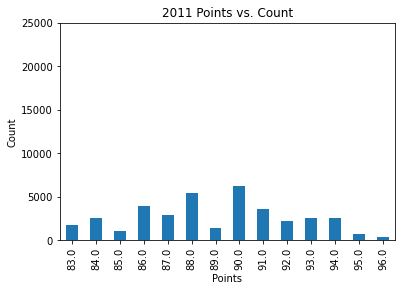

In [94]:
second_year = year_2011.groupby(['Points']).count()['Lat'].plot(kind='bar',xlim=(80,99),ylim=(0,25000),title='2011 Points vs. Count')
plt.ylabel('Count')
plt.savefig('2011_points_count.png')

In [54]:
year_2012 = temp_df[temp_df['Year'] == 2012]

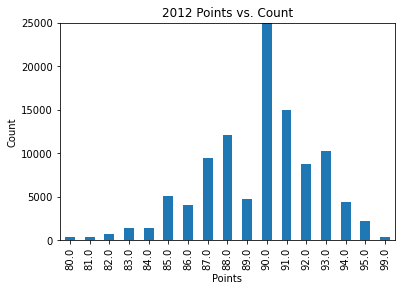

In [95]:
third_year = year_2012.groupby(['Points']).count()['Lat'].plot(kind='bar',xlim=(80,99),ylim=(0,25000),title='2012 Points vs. Count')
plt.ylabel('Count')
plt.savefig('2012_points_count.png')

In [56]:
year_2013 = temp_df[temp_df['Year'] == 2013]

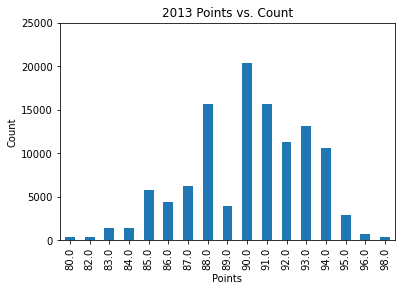

In [96]:
fourth_year = year_2013.groupby(['Points']).count()['Lat'].plot(kind='bar',xlim=(80,99),ylim=(0,25000),title='2013 Points vs. Count')
plt.ylabel('Count')
plt.savefig('2013_points_count.png')

In [58]:
year_2014 = temp_df[temp_df['Year'] == 2014]

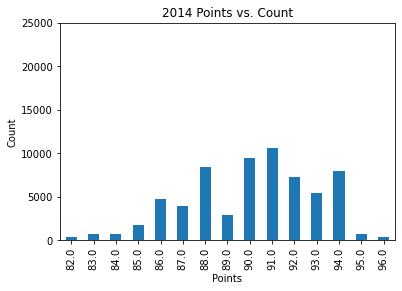

In [97]:
fifth_year = year_2014.groupby(['Points']).count()['Lat'].plot(kind='bar',xlim=(80,99),ylim=(0,25000),title='2014 Points vs. Count')
plt.ylabel('Count')
plt.savefig('2014_points_count.png')

In [60]:
year_2015 = temp_df[temp_df['Year'] == 2015]

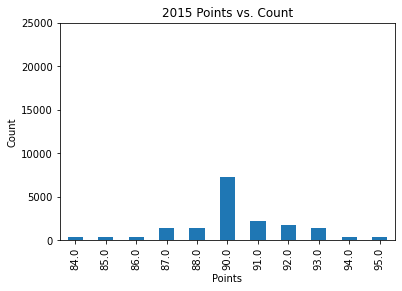

In [98]:
sixth_year = year_2015.groupby(['Points']).count()['Lat'].plot(kind='bar',xlim=(80,99),ylim=(0,25000),title='2015 Points vs. Count')
plt.ylabel('Count')
plt.savefig('2015_points_count.png')

In [62]:
year_2016 = temp_df[temp_df['Year'] == 2016]

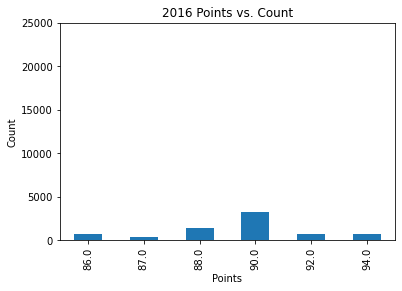

In [99]:
seventh_year = year_2016.groupby(['Points']).count()['Lat'].plot(kind='bar',xlim=(80,99),ylim=(0,25000),title='2016 Points vs. Count')
plt.ylabel('Count')
plt.savefig('2016_points_count.png')

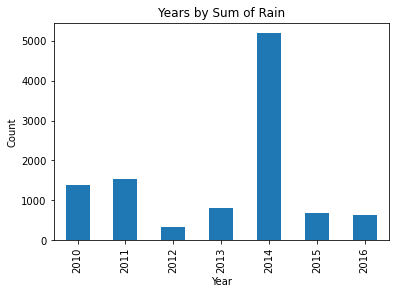

In [100]:
first_rain = temp_df.groupby(['Year']).sum()['Rain (inches)'].plot(kind='bar', title='Years by Sum of Rain')
plt.ylabel('Count')
plt.savefig('years_total_rain.png')

In [65]:
stat_mean_temp = weather_wine_data.groupby(['Date','Title']).mean()
population = stat_mean_temp.reset_index()

In [66]:
avg_score = population['temp'].median()
sample_above_score = population.loc[population['temp'] > avg_score]
sample_below_score = population.loc[population['temp'] < avg_score]

st.ttest_ind(sample_above_score['Points'], sample_below_score['Points'])

Ttest_indResult(statistic=3.5444181216427815, pvalue=0.00039352994044568264)

In [67]:
print(sample_above_score['Points'].mean())

89.85817223198595


In [68]:
print(sample_below_score['Points'].mean())

89.82437616274922


In [77]:
avg_rain = population['Rain (inches)'].mean()
rain_sample_above_score = population.loc[population['Rain (inches)'] > avg_rain]
rain_sample_below_score = population.loc[population['Rain (inches)'] < avg_rain]

st.ttest_ind(rain_sample_above_score['Points'], rain_sample_below_score['Points'])

Ttest_indResult(statistic=0.07904826290886945, pvalue=0.9369942782694454)

In [82]:
avg_wind = population['Wind Speed (mph)'].mean()
wind_sample_above_score = population.loc[population['Wind Speed (mph)'] > avg_wind]
wind_sample_below_score = population.loc[population['Wind Speed (mph)'] < avg_wind]

st.ttest_ind(wind_sample_above_score['Points'], wind_sample_below_score['Points'])

Ttest_indResult(statistic=13.89102100937867, pvalue=7.368009487220211e-44)

In [83]:
avg_humidity = population['Humidity'].mean()
humidity_sample_above_score = population.loc[population['Humidity'] > avg_humidity]
humidity_sample_below_score = population.loc[population['Humidity'] < avg_humidity]

st.ttest_ind(humidity_sample_above_score['Points'], humidity_sample_below_score['Points'])

Ttest_indResult(statistic=-12.86492464661391, pvalue=7.227152604210365e-38)

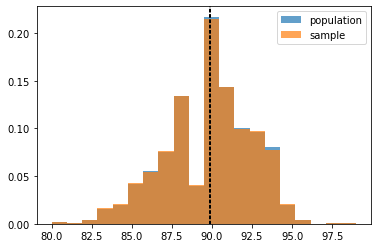

In [70]:
plt.hist(sample_above_score['Points'], 20, density=True, alpha=0.7, label="population")
plt.hist(sample_below_score['Points'], 20, density=True, alpha=0.7, label="sample")
plt.axvline(sample_above_score['Points'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample_below_score['Points'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()